# Time Domain vs Frequency Domain Tutorial


---

*A quick note before you start*: Follow the [link to NBviewer](https://nbviewer.jupyter.org/github/michellejw/timeseries/blob/master/TDvsFD.ipynb) for a full page view of this notebook, or check out the [Binder Page](https://mybinder.org/v2/gh/michellejw/timeseries/master?filepath=TDvsFD.ipynb) to access an online interactive version. You can access the Github repo [here](https://github.com/michellejw/timeseries).

---

## Python tools & skills you'll find here
- **Importing libraries (numpy, scipy, matplotlib)**
- **Basic plotting**
- **Example of building a sine wave**
- **Reading a wav (audio) file**
- **Taking the discrete fourier transform (FFT) of a time series signal**

### * What you won't find here (buyer beware!) *
I'm sorry to disappoint you, but I won't be covering most of the vast theory & nuances behind these concepts. There are entire courses that cover things like complex analysis and Fourier transforms. No way am I gonna fit that all in here. The purpose of this tutorial is to provide you with just enough tools and understanding to ~~be dangerous~~ have fun with data. I'll point you to other resources where relevant, and encourage you to dig in if you're curious! 

---

## What's in this tutorial?
The purpose of this tutorial is to explore the time domain and frequency domain representations of signals. You'll get an overview of concepts and also get a bunch of handy dandy Python code. Think of it as a tutorial PLUS a toolbox. 

Time series data are made up of a series of samples at equally spaced time intervals. Here are some examples:

* sound waves
* temperature
* ocean tides
* rainfall
* also non-environmental things like daily currency exchange rates

<!-- Here's how you embed an image in Markdown using html syntax -->
<img align="left" src="https://michw.com/IMAGES/singer-withtext-400px.png">

## Time Domain

Let's skip the small talk and jump right into a time domain example. First we'll import all the libraries we'll need to do the rest of the tutorial:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io.wavfile as wf

We'll begin with a simple sine wave with a frequency of 2 Hz (or 2 cycles per second):

In [2]:
F = 2 # frequency in Hz
fs = 50 # sample rate in Hz
A = 1 # Amplitude
duration = 2
tvec = np.arange(0.,duration,1/fs) # time vector
sig = np.sin(2*np.pi*F*tvec) # sine wave

... and plot that sine wave, yeah!

(0, 1.98)

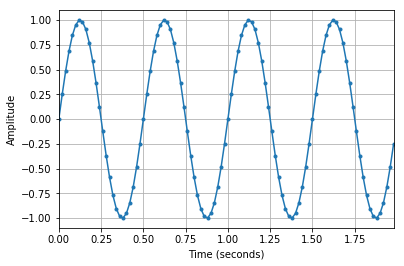

In [3]:
plt.plot(tvec,sig,'.-')
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0,duration-(1/fs))

In the plot above, each dot is a data point. The sine wave has a frequency of 2 Hz (or, 2 cycles per second). That sine wave is sampled 50 times every second, which is also known as the sample rate. 

This way of looking at the data, with time on the x-axis, and amplitude on the y-axis, is also known as the **time domain representation**. It's a bit boring just looking at a sinusoid, so let's have a look at a snippet of music from one of my favorite movies. (This is just a 30-second snippet, but you can listen to the whole song on Youtube [here](https://youtu.be/AFa1-kciCb4)) 

<img align="left" src="https://michw.com/IMAGES/clint-wide-800px.png">

In [4]:
# This function reads the wav file, and assigns the signal to the "dat" 
# variable, and the sample rate to the "fs" variable
# (The file was downloaded from https://en.wikipedia.org/wiki/The_Good,_the_Bad_and_the_Ugly_(theme))
wavfile = 'good-bad-ugly-8k.wav'
fs, dat = wf.read(wavfile)
dat = dat[:,0] # Pull out a single channel since this file has two!

# Now let's build a time vector so we can plot it. The sound file duration (in seconds) 
# is computed from the number of samples divided by the sample rate
duration = len(dat)/fs 
tvec = np.linspace(0,duration,len(dat))

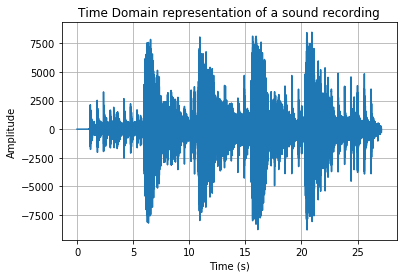

In [5]:
plt.plot(tvec,dat)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain representation of a sound recording')
plt.show()

And there we have it - a lovely **Time Domain** representation of a sound recording. You can see some interesting things here. For example, the recording starts off pretty quietly, has a louder part in the middle, and then ends fairly quietly again. You can see four higher amplitude sections, around 6 seconds, 11 seconds, 16 seconds, and 21 seconds.

**But what if you want MOAR?**

<img align="left" src="https://michw.com/IMAGES/moar-biden.jpg">



## Frequency Domain

You know this is a sound recording. But you might be wondering if there are high frequencies or low frequencies or harmonics or any of that good stuff. As you might have guessed, that is where the **Frequency Domain** comes into play. 

### A bit of history

<img align="left" src="https://michw.com/IMAGES/Fourier2.jpg" style="width: 250px;">

This dapper fellow is Joseph Fourier. He was born 250 years ago and was most famous for figuring out that time series functions can be mathematically broken up into their constituent frequencies. 

*BONUS: He also discovered the Greenhouse Effect, no biggie*

[Image source (Wikipedia)](https://en.wikipedia.org/wiki/Joseph_Fourier#/media/File:Fourier2.jpg)

To learn more, check out the [Wikipedia page for Fourier Transforms](https://en.wikipedia.org/wiki/Fourier_transform) or for [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series). These are not the greatest learning references but I'll keep them here until I find something better. Please get in touch if you know of a good overview!

### Time to look at data!
Once again, a sine wave...

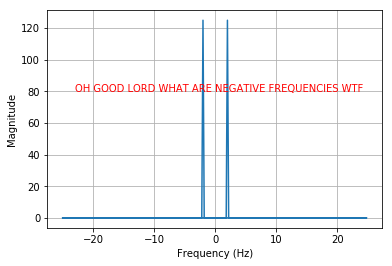

In [10]:
F1 = 2 # frequency in Hz
fs1 = 50 # sample rate in Hz
A1 = 1 # Amplitude
dur1 = 5 # Duration in seconds
tvec1 = np.arange(0.,dur1,1/fs1) # time vector
sig1 = np.sin(2*np.pi*F1*tvec1) # sine wave

# Now take the discrete Fourier Transform (using the Fast Fourier Transform algorithm, aka the FFT)
sig1_fft = np.fft.fft(sig1)
fvec1 = np.fft.fftfreq(tvec1.shape[-1],0.02)

plt.close()
plt.plot(fvec1,np.abs(sig1_fft)) # Note that we're looking at the absolute value of the complex-valued fft
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.text(-23,80,'OH GOOD LORD WHAT ARE NEGATIVE FREQUENCIES WTF',color='red')
plt.show()